# TCII 

### Destefano, Martin 

## Trabajo semanal 1 (Ejercicio N°7 TP1) 

Se realizara el analisis del siguiente circuito, el cual representa un Filtro Pasa Todo o Rotador de fase: 

![Circuit](.\circuito1.png)

### Transferencia del circuito 

$$
(Ec.1)\\ 
(Vb-V1)*SC = \frac{-Vb}{R3}\\ 
(Ec.2)\\ 
\frac{Va - V1}{R1} = \frac{V2 - Va}{R2}\\ 
(Ec.3)\\ 
Va = Vb 
$$

De Ec. 1: 

$$ 
    Vb(SC+\frac{1}{R3} = V1SC \, (Ec. 1.1) \\ 
     \\Vb = \frac{V1SCR3}{R3SC+1} \, (Ec. 1.2) \\ 
$$

De Ec. 2: 

$$ 
    Va(\frac{1}{R1}+\frac{1}{R2})=\frac{V2}{R2}+\frac{V1}{R1} \, (Ec. 2.1) \\ 
    Va = \frac{R1V2+R2V1}{R2+R1} \, (Ec 2.2) \\ 
$$

Combinando Ec. 1.2, Ec 2.2 y Ec. 3: 

$$
    \frac{V1SCR3}{R3SC+1} = \frac{R1V2+R2V2}{R2+R1} \, (Ec. 3.1) \\ 
    V1(\frac{V1SCR3}{R3SC+1} - \frac{R2}{R2+R1}) = \frac{R1V2}{R2+R1} \, (Ec. 3.2) \\
    V1\frac{SCR3R1-R2}{R3SC+1} = V2R1 \, (Ec. 3.3) \\
    T(S) = \frac{V2}{V1} = \frac{SCR3R1-R2}{SCR3R1+R1} = \frac{S-\frac{R2}{R3R1C}}{S+\frac{1}{R3C}}  V2R1 \, (Ec. 3.3) \\
$$

Si: $\omega0 = \frac{1}{R3C}$

$$     T(S) = \frac{S-\frac{R2}{R1}\omega0}{S+\omega0} 
$$

![Module] 
![Fasep]
![Poleandzero] 

Link a fotos en papel 

### Modulo y fase 

A continuacion calcularemos el modulo de la funcion: 

$$ |T(jw)| = \frac {\sqrt{-\omega + (\frac{R1}{R2})^2 \omega0}}{\sqrt{-\omega^2+\omega0^2}} $$

Si suponemos R1 = R2, la transferencia nos remite a un pasatodo, con modulo 1 para cualquier frecuencia. De no ser asi, nos queda: 

$|T(jw)|_{\omega=0} = \frac{R2}{R1} \\$ 
$|T(jw)|_{\omega=\omega0} = 1 \\ $

$|T(jw)|_{\omega\rightarrow\infty} \rightarrow \infty \\ $ 

Para la fase, evaluo el diagrama de polos y ceros, considerando que $ \frac{R1}{R2} = 1 $: 

$\phi_{\omega=0} = 0 $

$\phi_{\omega=\omega0} = -\frac{\pi}{2} $

$\phi_{\omega\rightarrow\infty} = -\pi $

### Verificacion del analisis con la funcion sin normalizar

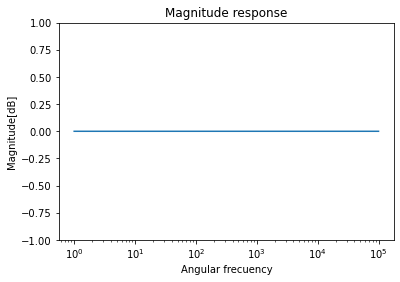

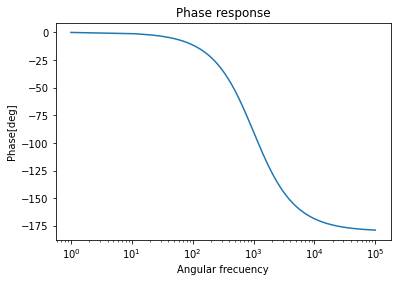

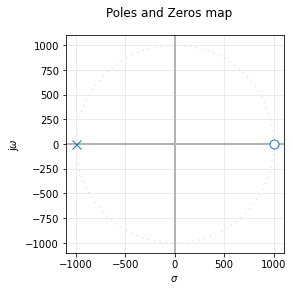

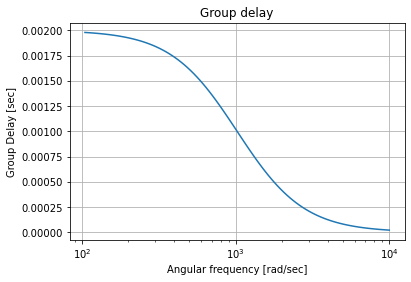

In [2]:
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap, grpDelay
import numpy as np

R=1000
C=0.000001

wo=np.arange(1, 10**5, 10)
sys = signal.TransferFunction([-C*R,1], [C*R,1])
w, mag, phase = signal.bode(sys,wo)

plt.figure()
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)    # Diagrama de bode en magnitud
plt.ylim([-1,1])

plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Diagrama de bode en fase

pzmap(sys)              # Diagrama de Polos y Ceros
grpDelay(sys)
plt.show()

### Funcion de transferencia normalizada 

Con la siguiente norma de frecuencia $\Omega_{w} = \omega0$ y si consideramos $\frac{R2}{R1} = 1$: 
$$ $=\frac{S}{\omega0} $$ 

$$ T(S)=\frac{$-1}{$+1} $$ 

{Explicacion sobre porque utilizamos w0 como norma de frecuencia}


### Simulacion con Python de la funcion normalizada

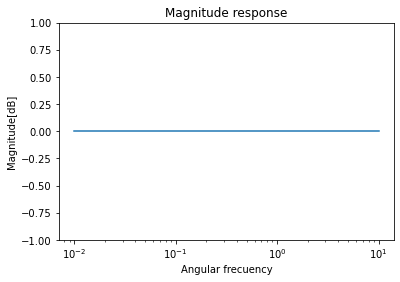

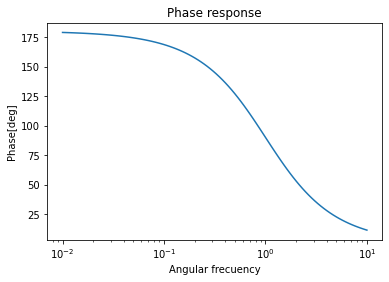

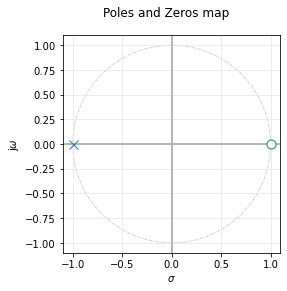

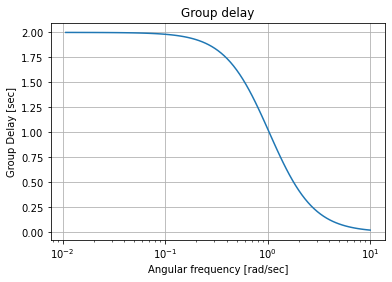

In [3]:
from splane import pzmap, grpDelay 
from scipy import signal
import matplotlib.pyplot as plt
my_tf = signal.TransferFunction([1,-1], [1, 1])
w, mag, phase = signal.bode(my_tf)
plt.figure()
plt.ylim(-1,1)
plt.title('Magnitude response')
plt.xlabel('Angular frecuency')
plt.ylabel('Magnitude[dB]')
plt.semilogx(w, mag)    # Modulo
plt.figure()
plt.title('Phase response')
plt.xlabel('Angular frecuency')
plt.ylabel('Phase[deg]')
plt.semilogx(w, phase)  # Fase
pzmap(my_tf)            # Polos y zeros 
grpDelay(my_tf)         # Retardo de grupo 
plt.show()
plt.close('all')


## Simulacion del circuito con LTSpice

A continuacion realizamos la simulacion en frecuencia del circuito mediante el software LTSpice. Para la simulacion consideraremos $\frac{R2}{R1} = 1$, $ R3=1K\Omega $ $ C=1{\mu}F $

![CircuitLTS](.\CircuitoLTS.png)

![Graph](.\Graph1.png)

Como podemos observar la el modulo es aproximadamente 0dB para un amplio espectro de frecuencias, caracteristica que identifica el filtro pasa todo. 

### Usos de pasatodo y aplicaciones 